## [1] 미분

In [47]:
import torch

# 1. 초기 설정
w = torch.tensor(4.0, requires_grad=True)

# 2. 기울기 계산
# L(w) = (w - 3)^2
L = (w - 3) ** 2

# 3. 역전파(Backpropagation) 실행
# 도함수 실행
# L.backward()를 호출하면C L이 w에 대해
# 미분된 값(기울기)값 +2가
#  w.grad에 저장됩니다.

L.backward()

print(f'L(w)=w2-w1: {L.item():.6f}')
print(f'업데이트전 w값:  {w.item()}')
print(f'도함수적용(미분): {w.grad.item()}')


L(w)=w2-w1: 1.000000
업데이트전 w값:  4.0
도함수적용(미분): 2.0


In [39]:
import torch.optim as optim
learning_rate = 1.0  # 학습률을 1.0으로 설정
optimizer = optim.SGD([w], lr=learning_rate)
optimizer.step()

print(f'역전파된 w값:  {w.item()}')


역전파된 w값:  2.0


## [2] exp자연상수

In [44]:
import torch
import torch.optim as optim

# 1. 초기 설정
w = torch.tensor(4.0, requires_grad=True)

# 2. 손실함수 정의 : L = exp(w)
#L = torch.exp(w)
L=w

# 3. 역전파 수행 (dL/dw 계산)
L.backward()
print(f'L(w)=w2-w1: {L.item():.6f}')
print(f'업데이트전 w값:  {w.item()}')
print(f'도함수적용(미분): {w.grad.item()}')


# 4. 경사하강법으로 w 업데이트
learning_rate = 1.0
optimizer = optim.SGD([w], lr=learning_rate)
optimizer.step()   # w ← w - lr * grad

print(f"업데이트 후 w값: {w.item():.6f}")


L(w)=w2-w1: 4.000000
업데이트전 w값:  4.0
도함수적용(미분): 1.0
업데이트 후 w값: 3.000000


In [6]:




# 4. 업데이트된 w 값 확인
print("\n**Step 2: w 업데이트 후**")
print(f"업데이트 후 w = {w.item()}")

**Step 1: 미분값 확인**
w.grad (기울기) = 2.0
업데이트 전 w = 4.0

**Step 2: w 업데이트 후**
업데이트 후 w = 2.0


## [3] 시그모이드

0.0066928509242848554 ~ 0.9996646498695336


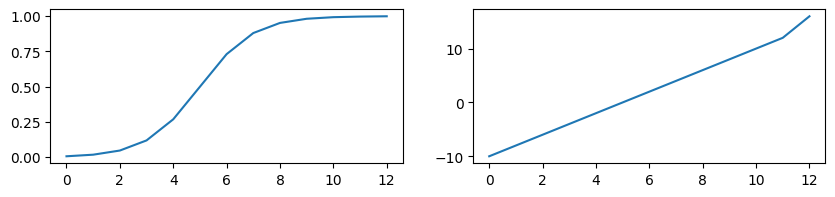

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x =np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,8])
y_linear=2*x
y_sigmoid= 1 / (1 + np.exp(-x)) # 무조건 0~1사이값이됨
print(y_sigmoid.min(), '~',y_sigmoid.max())

plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
plt.plot(y_sigmoid)
plt.subplot(1,2,2)
plt.plot(y_linear)

In [ ]:
import numpy as np
x = [-20, -4, -2, 0, 2, 4, 20]
for i in x:
    result = np.exp(i)
    print(f"{i:>3} -> exp: {format(result, '.20f')}")

-20 -> exp: 0.00000000206115362244
 -4 -> exp: 0.01831563888873417867
 -2 -> exp: 0.13533528323661270232
  0 -> exp: 1.00000000000000000000
  2 -> exp: 7.38905609893065040694
  4 -> exp: 54.59815003314423620395
 20 -> exp: 485165195.40979027748107910156


In [49]:
import torch
import torch.nn.functional as F

# 시그모이드 함수와 그 미분 (σ'(x) = σ(x)(1 - σ(x)))
x = torch.tensor([-20., -4., -2., 0., 2., 4., 20.])

# 1. 시그모이드 값
y = torch.sigmoid(x)

# 2. 미분값(기울기)
grad = y * (1 - y)

# 결과 출력
for i, (val, g) in enumerate(zip(y, grad)):
    print(f"x={x[i].item():>5} → sigmoid={val.item():.6f},  gradient={g.item():.8f}")


x=-20.0 → sigmoid=0.000000,  gradient=0.00000000
x= -4.0 → sigmoid=0.017986,  gradient=0.01766271
x= -2.0 → sigmoid=0.119203,  gradient=0.10499358
x=  0.0 → sigmoid=0.500000,  gradient=0.25000000
x=  2.0 → sigmoid=0.880797,  gradient=0.10499363
x=  4.0 → sigmoid=0.982014,  gradient=0.01766273
x= 20.0 → sigmoid=1.000000,  gradient=0.00000000


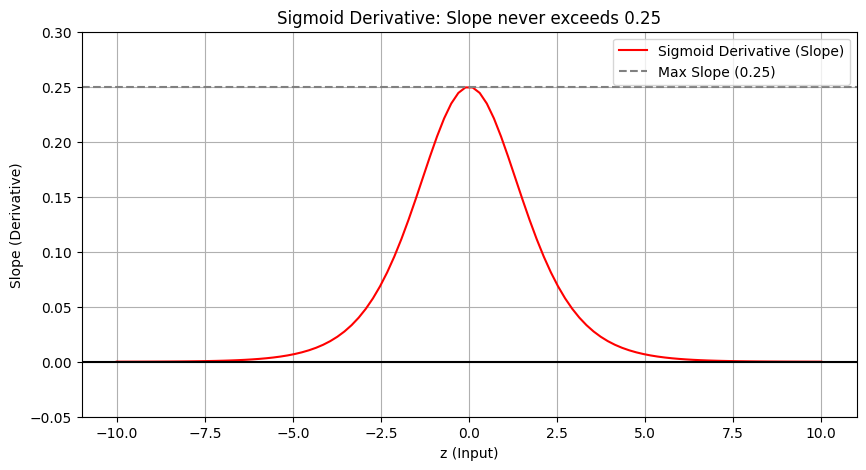

계산된 최대 기울기 값: 0.2494


In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의 (파이토치 사용)
def sigmoid(z):
    return torch.sigmoid(z)

# 미분값(기울기) 계산 함수 정의
def calculate_slope(z_value):
    # 1. z 텐서 정의 (미분 추적 활성화)
    z = torch.tensor(z_value, requires_grad=True)

    # 2. 시그모이드 함수 계산
    s = sigmoid(z)

    # 3. 역전파(backward)로 기울기 계산
    s.backward()

    # 4. 기울기 값 반환
    return z.grad.item()

# 1. z 값 범위 설정 (넓은 범위: -10부터 10까지)
z_values = np.linspace(-10, 10, 100)

# 2. 각 z 값에 대한 기울기 계산
slopes = [calculate_slope(z) for z in z_values]

# 3. 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(z_values, slopes, label="Sigmoid Derivative (Slope)", color='red')

# 4. 최대 기울기 값 0.25 선 표시
plt.axhline(0.25, color='gray', linestyle='--', label="Max Slope (0.25)")
plt.axhline(0, color='black', linestyle='-') # x축 (기울기 0)

# 5. 그래프 설정
plt.title("Sigmoid Derivative: Slope never exceeds 0.25")
plt.xlabel("z (Input)")
plt.ylabel("Slope (Derivative)")
plt.ylim(-0.05, 0.3) # y축 범위를 0.3까지 제한하여 0.25를 넘지 않음을 강조
plt.legend()
plt.grid(True)
plt.show()

# 최대 기울기 값 확인 (실제 계산된 최댓값)
print(f"계산된 최대 기울기 값: {max(slopes):.4f}")